<a href="https://colab.research.google.com/github/women-in-ai-ireland/September-2022-CeADAR-Group-002/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df0=pd.read_csv("https://raw.githubusercontent.com/women-in-ai-ireland/September-2022-CeADAR-Group-002/main/dataset/HousingData.csv")
df=df0.set_index(['County','Quarter'],drop=False)

In [2]:
df.info()
df.isna().sum()
# We do not have any missing value!

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1196 entries, ('Carlow', '2011Q1') to ('Wicklow', '2022Q2')
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            1196 non-null   object 
 1   Quarter           1196 non-null   object 
 2   New_House_n       1196 non-null   int64  
 3   Sales_Volume_n    1196 non-null   int64  
 4   Sales_Value_MEur  1196 non-null   float64
 5   Median_Price_Eur  1196 non-null   int64  
 6   Mean_Price_Eur    1196 non-null   int64  
 7   Stock_House_n     1196 non-null   int64  
 8   Vacant_House_n    1196 non-null   int64  
 9   Population        1196 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 98.5+ KB


County              0
Quarter             0
New_House_n         0
Sales_Volume_n      0
Sales_Value_MEur    0
Median_Price_Eur    0
Mean_Price_Eur      0
Stock_House_n       0
Vacant_House_n      0
Population          0
dtype: int64

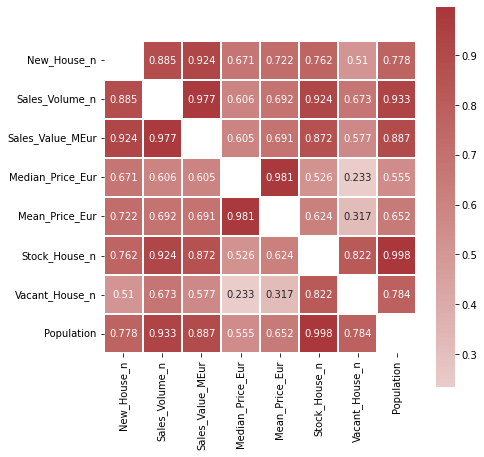

In [3]:
plt.figure(figsize = (7,7))
df_corr = df.corr(method="pearson")
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), annot=True,square=True,center=0, fmt='.3g',linewidths=1,cmap="vlag");

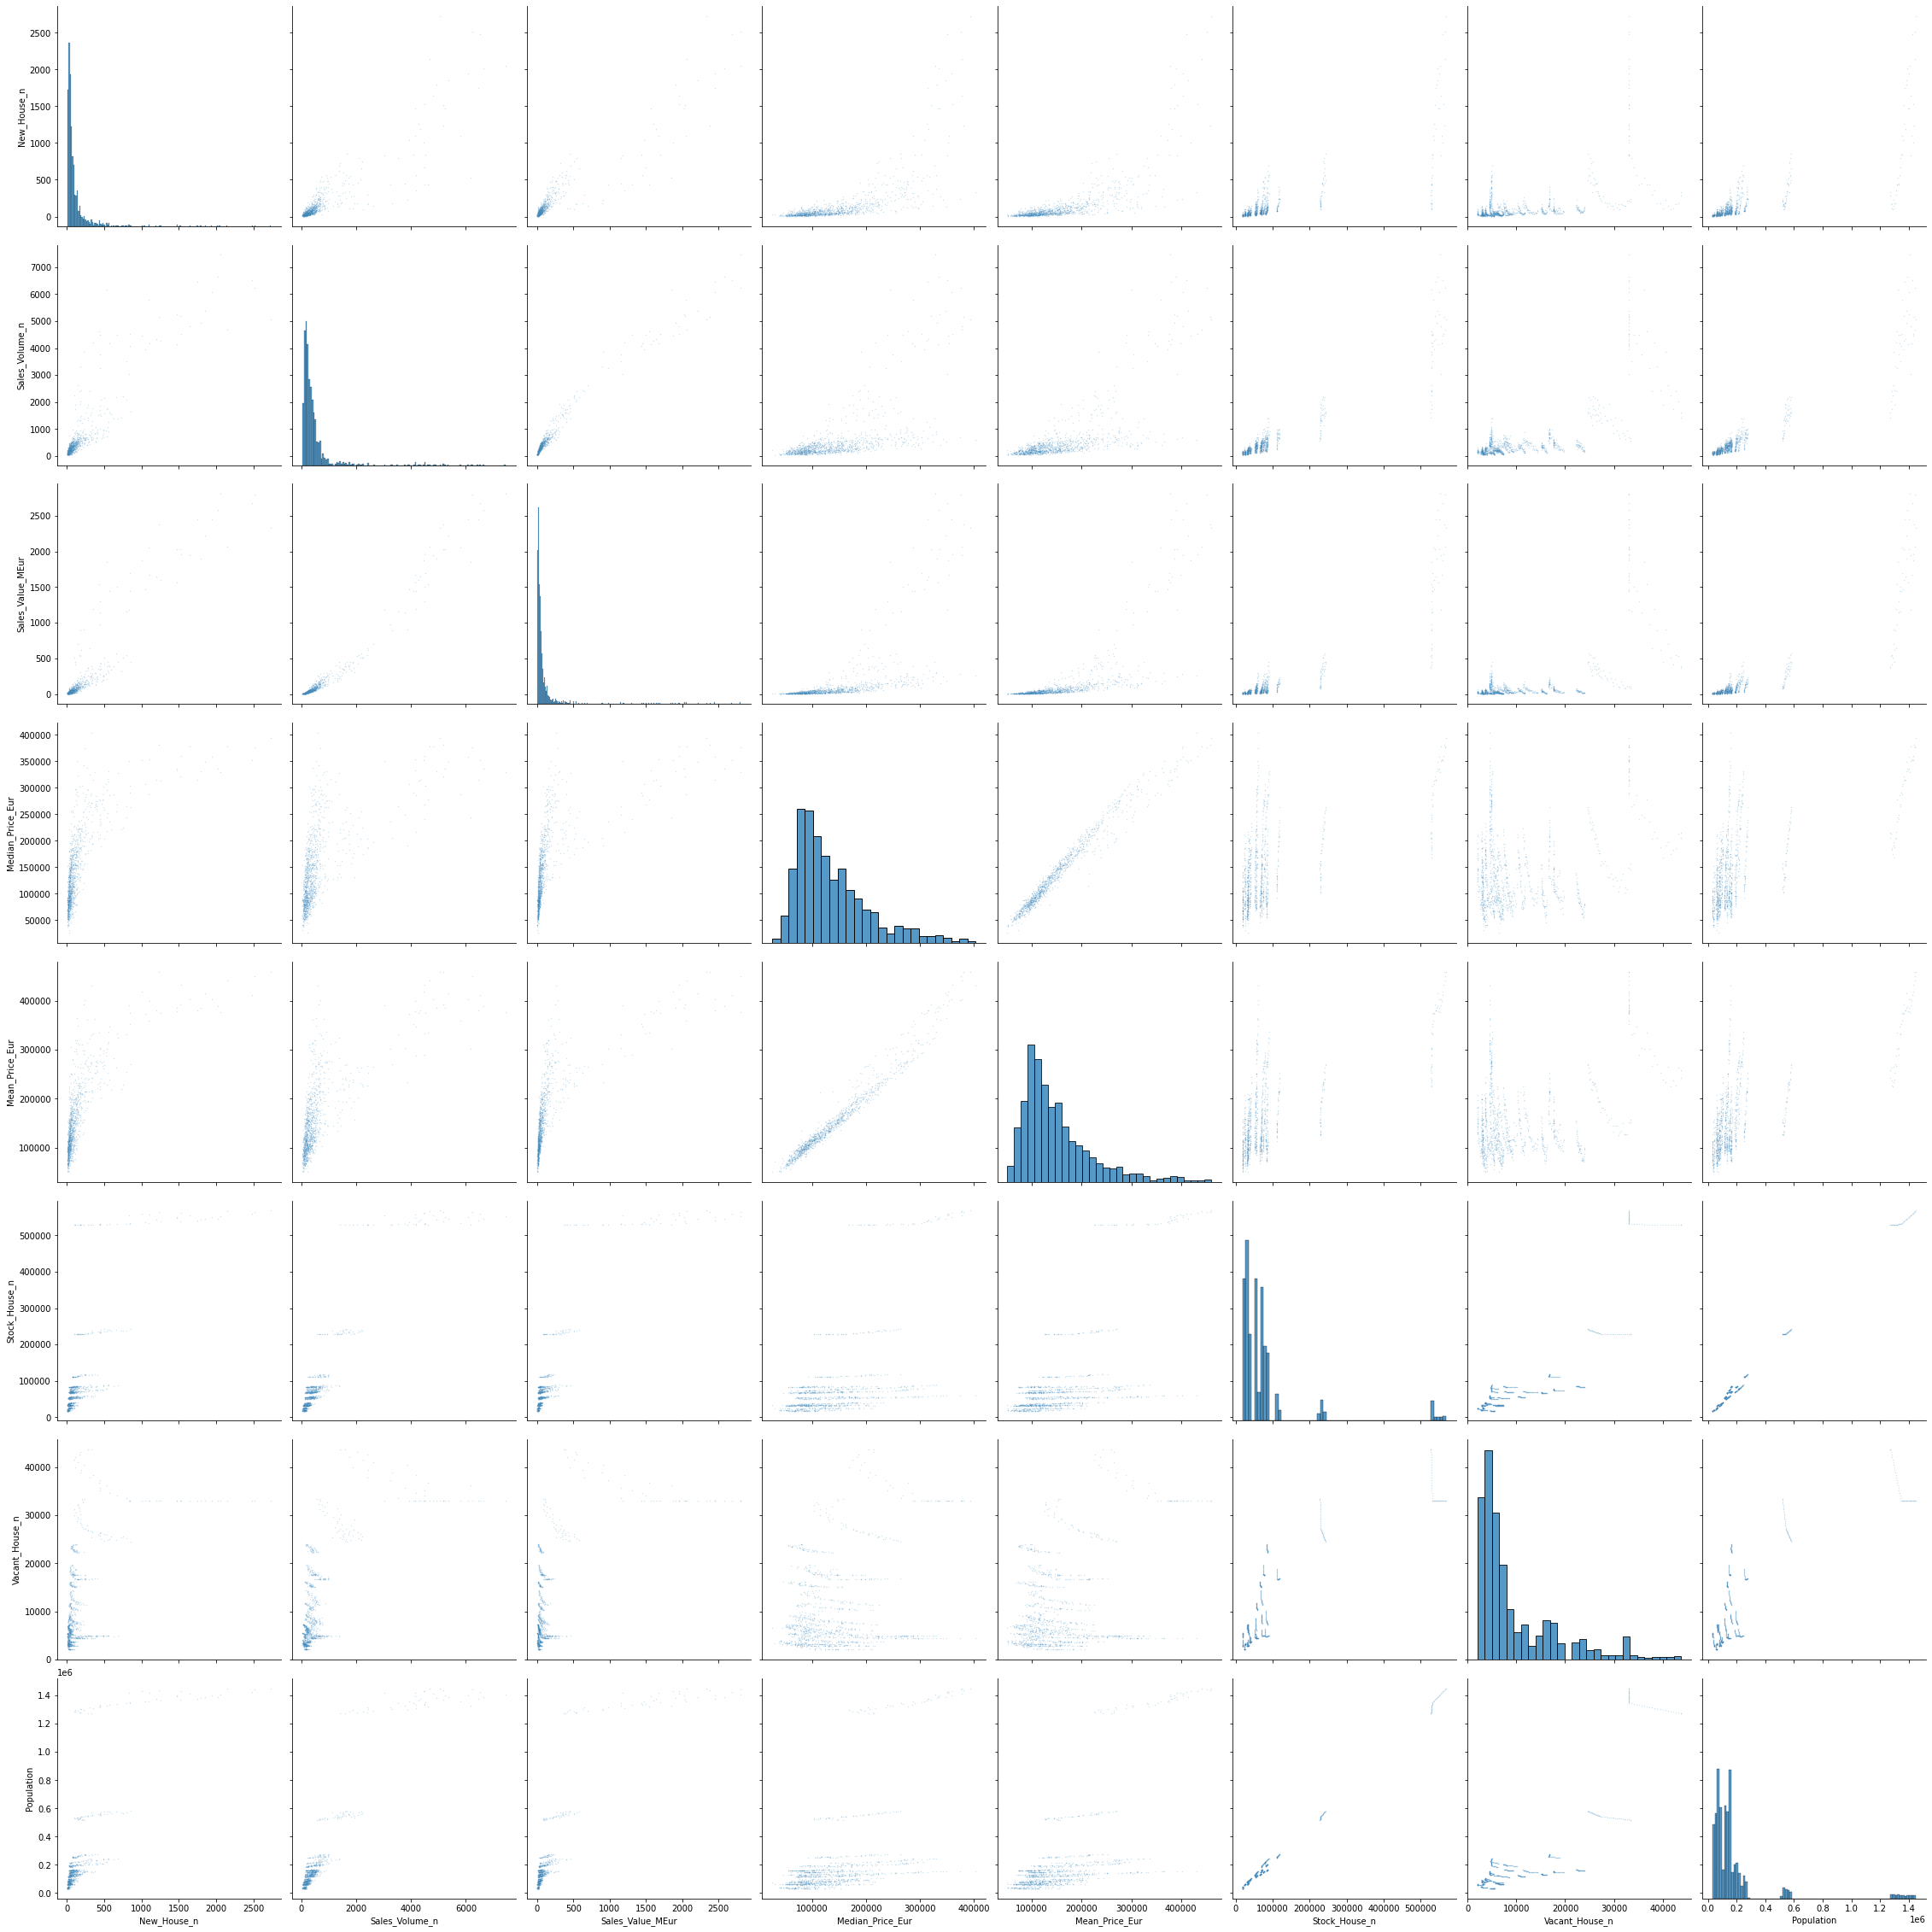

In [4]:
# pairplot of all numeric variables for all counties and all quarters

sns.pairplot(df, height=4,plot_kws={"s": 2,"alpha": 0.2});

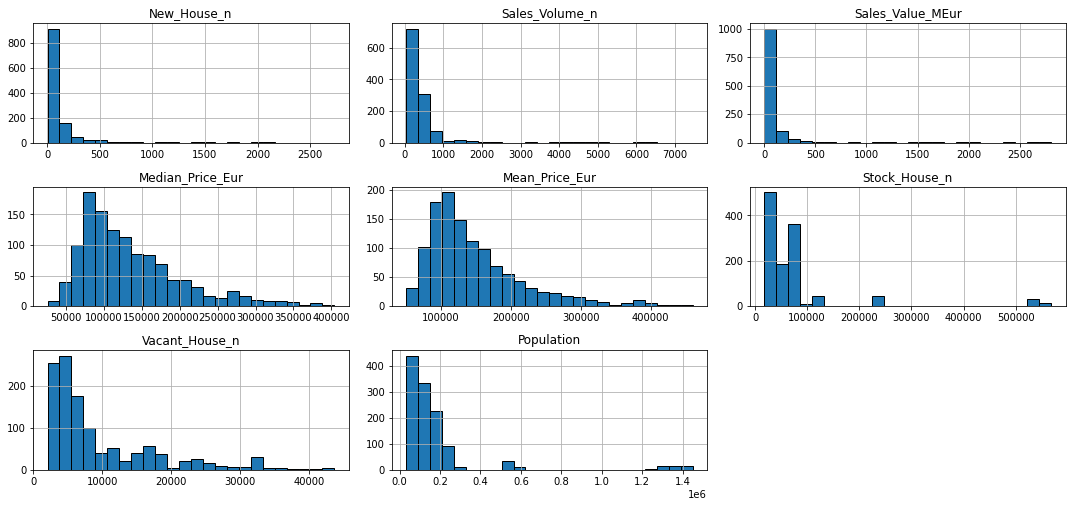

In [5]:
# distribution of variables for all counties and all quarters

df.hist(bins=24, figsize=(15, 9), layout=(4, 3), edgecolor="black")
plt.tight_layout();

In [6]:
# because the scatter plot is messy, we select top three  and bottom two counties according to population

selected_counties=df.loc[(slice(None),'2022Q2'),'Population'].sort_values(ascending=False)[[0,1,2,-2,-1]].index.get_level_values(0)
df_sel=df.loc[selected_counties]
# df_sel

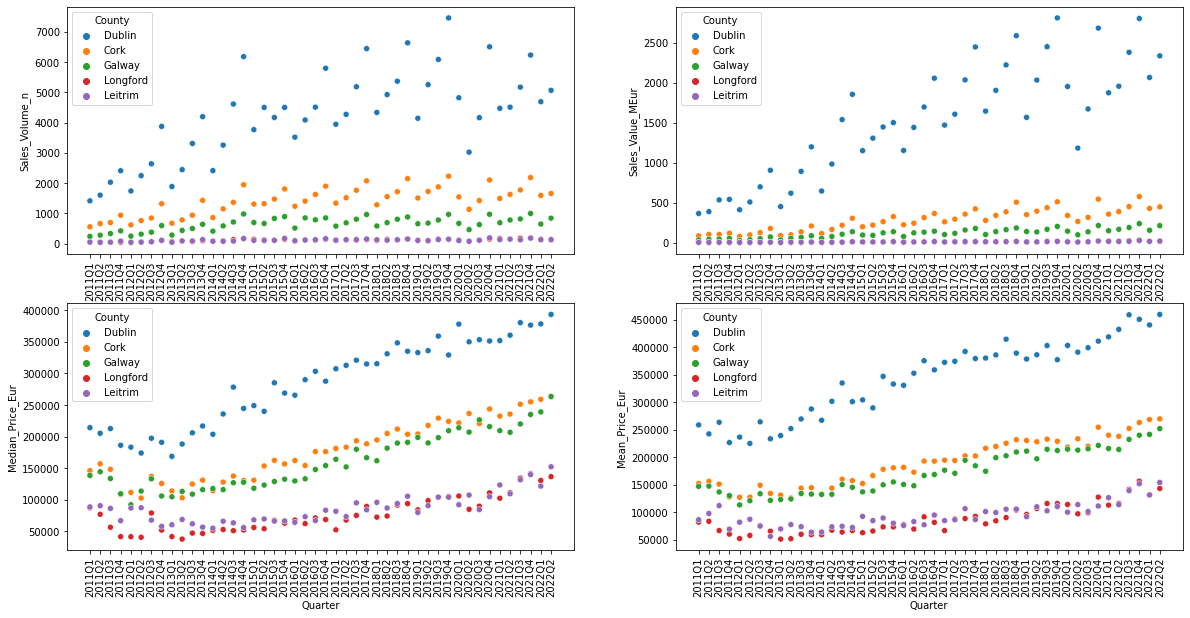

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))

sns.scatterplot(data=df_sel, x="Quarter", y="Sales_Volume_n",hue='County' , ax=axs[0][0]);
sns.scatterplot(data=df_sel, x="Quarter", y="Sales_Value_MEur",hue='County' , ax=axs[0][1]);
sns.scatterplot(data=df_sel, x="Quarter", y="Median_Price_Eur",hue='County' , ax=axs[1][0]);
sns.scatterplot(data=df_sel, x="Quarter", y="Mean_Price_Eur",hue='County' , ax=axs[1][1]);

[ax.tick_params(axis='x', rotation=90) for ax in axs.flatten()];

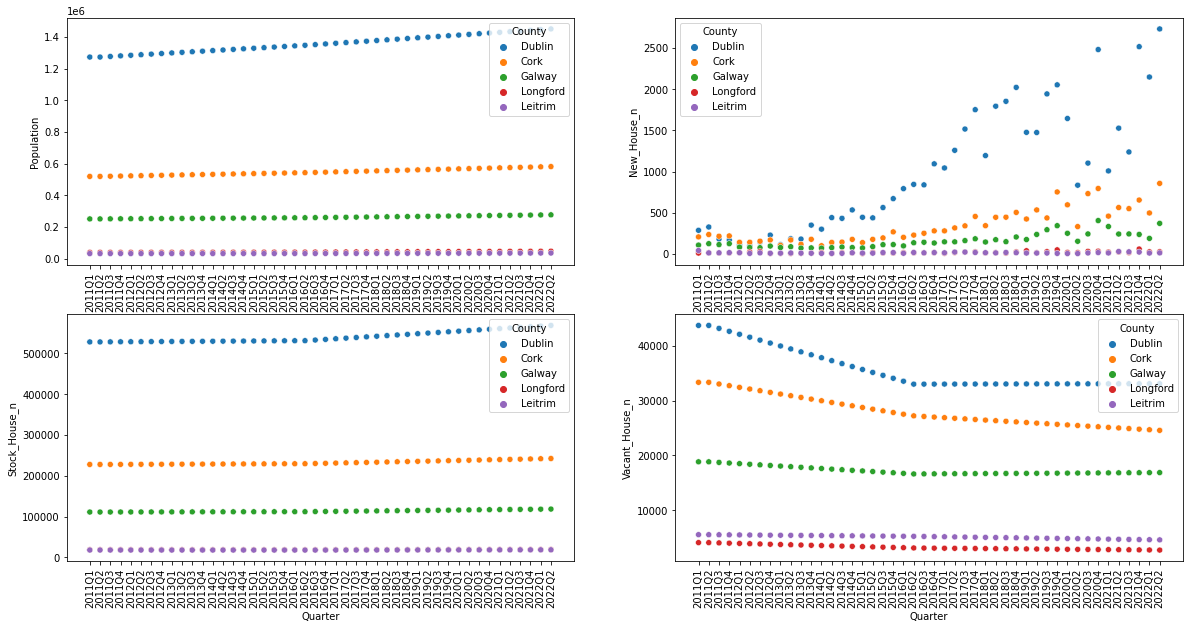

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))

sns.scatterplot(data=df_sel, x="Quarter", y="Population",hue='County' , ax=axs[0][0]);
sns.scatterplot(data=df_sel, x="Quarter", y="New_House_n",hue='County' , ax=axs[0][1]);
sns.scatterplot(data=df_sel, x="Quarter", y="Stock_House_n",hue='County' , ax=axs[1][0]);
sns.scatterplot(data=df_sel, x="Quarter", y="Vacant_House_n",hue='County' , ax=axs[1][1]);

[ax.tick_params(axis='x', rotation=90) for ax in axs.flatten()];

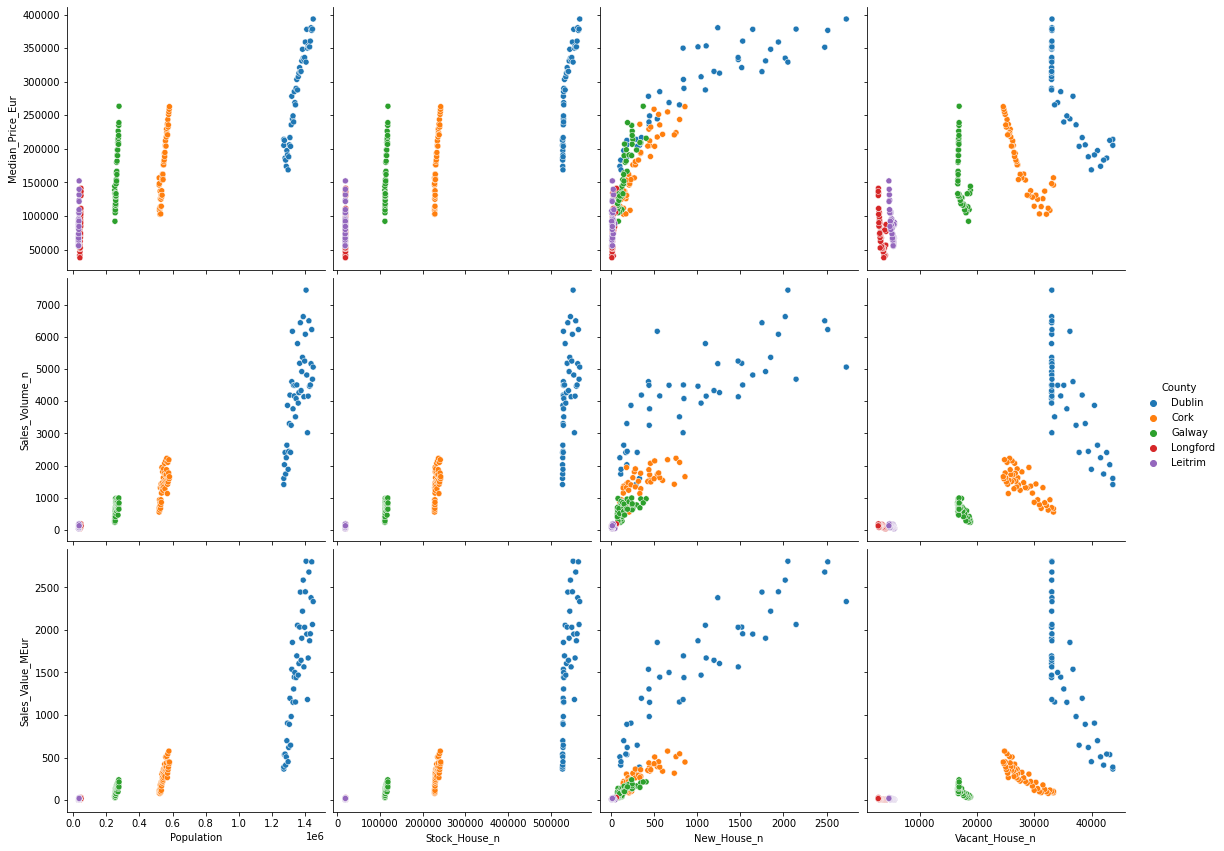

In [9]:
sns.pairplot(data=df_sel,
             y_vars=['Median_Price_Eur','Sales_Volume_n','Sales_Value_MEur'],
             x_vars=['Population','Stock_House_n','New_House_n','Vacant_House_n'],
             hue="County", height=4);

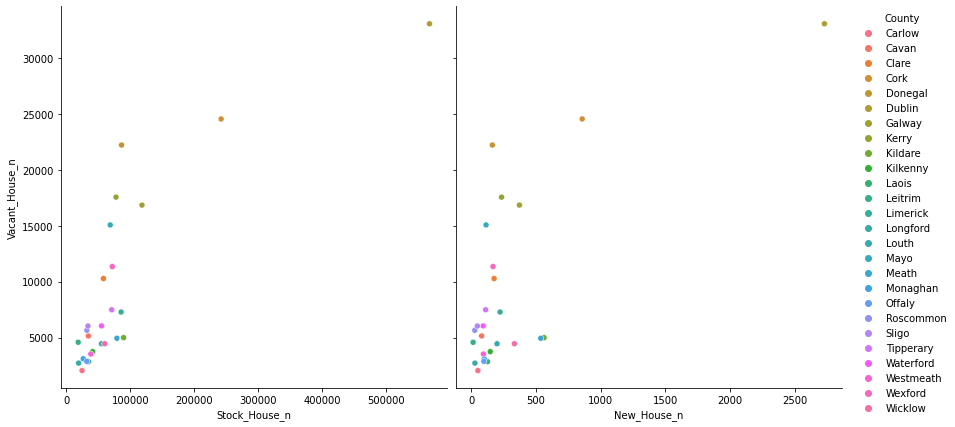

In [10]:
# to compare all counties, we take a snapshot in second quarter of 2022

df_recent=df.loc[(slice(None),'2022Q2'),]
sns.pairplot(data=df_recent,y_vars='Vacant_House_n',x_vars=['Stock_House_n','New_House_n'], hue="County", height=6);